In [1]:
from utils.GraphGenerator import GraphGenerator
from utils.GraphVisualizer import GraphVisualizer
from utils.datasets import generate_points

blobs_points = generate_points('blobs', n_samples=500, n_clusters=3)
moons_points = generate_points('moons', n_samples=500, n_clusters=2)
circles_points = generate_points('circles', n_samples=500, n_clusters=2)

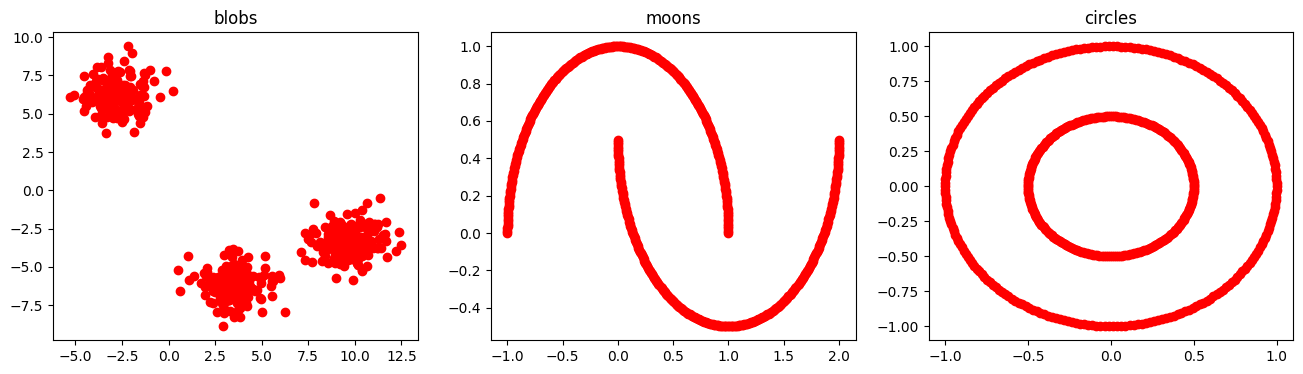

In [2]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 4))
axs = fig.subplots(1, 3)
datasets = ['blobs', 'moons', 'circles']

for i in range(len(datasets)):
    blobs_points = generate_points(datasets[i], n_samples=500, n_clusters=3)
    G = GraphGenerator(blobs_points.copy()) \
        .to_graph(gen_pair_wise=True)

    gv = GraphVisualizer(G)
    gv.plot_graph(datasets[i],axs[i])

running boruvkas algorithm: max_iterations = 30
Graph:
round 1
neighborhoods: ['(288, {288, 0, 449, 294, 86, 183}) ', '(1, {1, 248, 175}) ', '(2, {145, 2, 170, 412}) ', '(72, {3, 72, 237}) ', '(81, {81, 209, 451, 4, 303}) ', '(5, {361, 5}) ', '(6, {194, 356, 6, 105, 478, 79}) ', '(7, {261, 7}) ', '(352, {352, 370, 8, 378}) ', '(69, {97, 242, 69, 277, 9}) ', '(10, {10, 134, 138}) ', '(11, {11, 135}) ', '(12, {484, 312, 12}) ', '(13, {380, 13, 399}) ', '(207, {304, 481, 14, 207}) ', '(15, {114, 15}) ', '(291, {16, 291, 499}) ', '(17, {17, 385, 155}) ', '(18, {18, 190, 46}) ', '(19, {19, 445}) ', '(110, {110, 305, 20, 310, 186}) ', '(21, {210, 21, 121, 444}) ', '(142, {350, 22, 142, 414, 479}) ', '(23, {45, 23}) ', '(24, {384, 404, 24, 266}) ', '(216, {113, 35, 216, 25, 236}) ', '(104, {104, 57, 26, 476}) ', '(27, {280, 334, 308, 472, 27, 28}) ', '(418, {417, 418, 387, 36, 422, 491, 466, 92, 29}) ', '(30, {154, 30}) ', '(31, {332, 31}) ', '(39, {32, 96, 39, 415, 239}) ', '(117, {33, 394, 

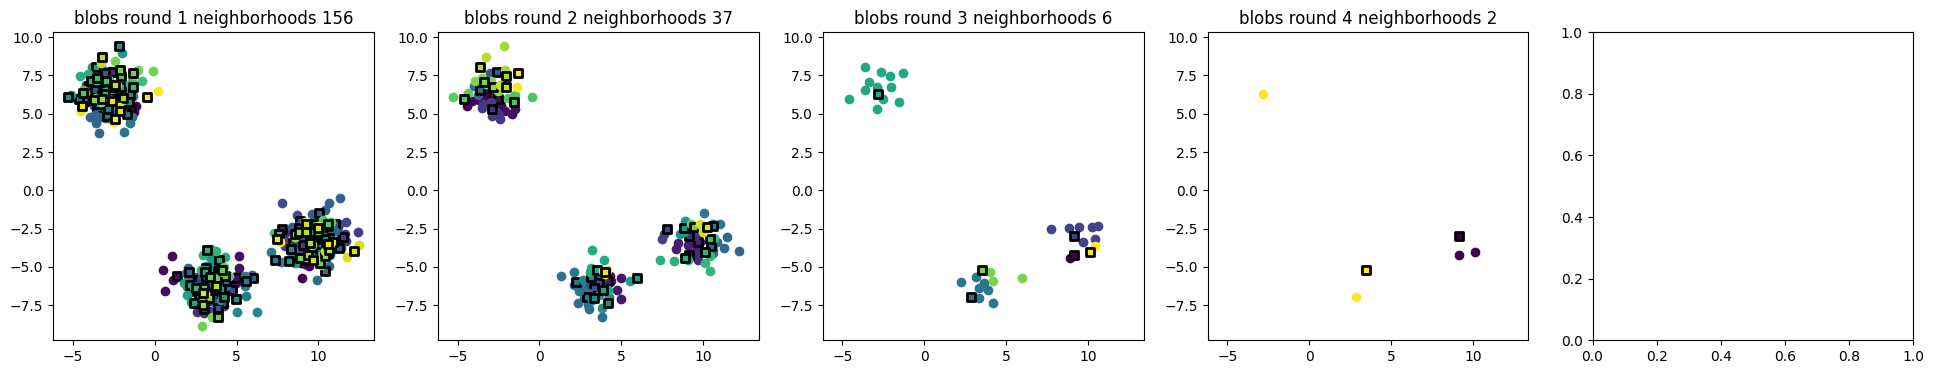

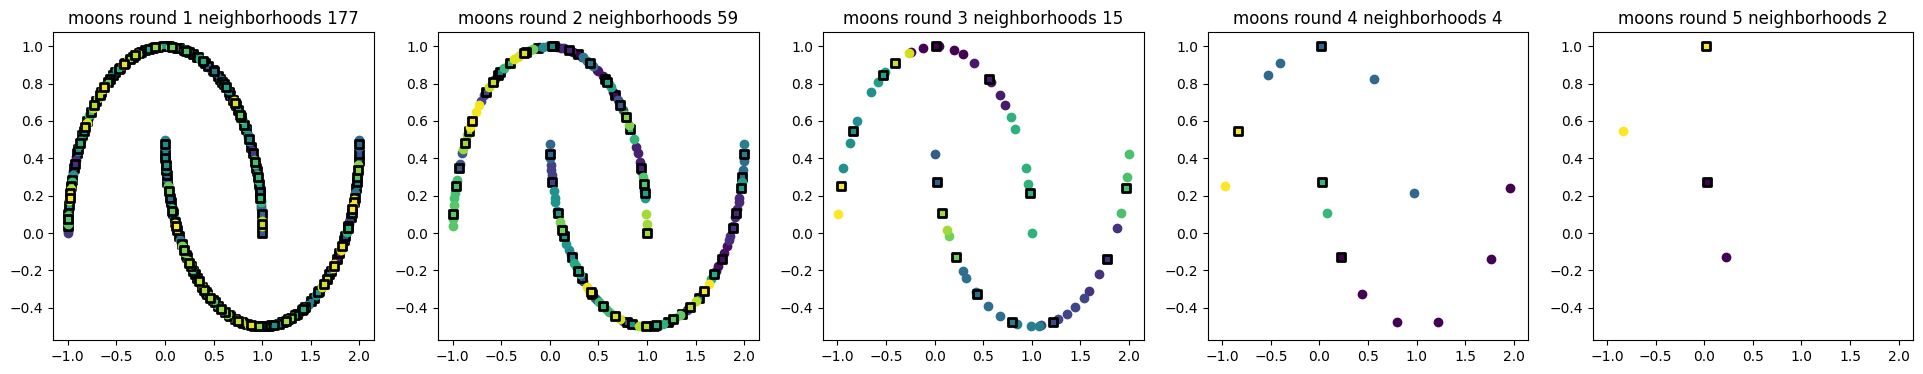

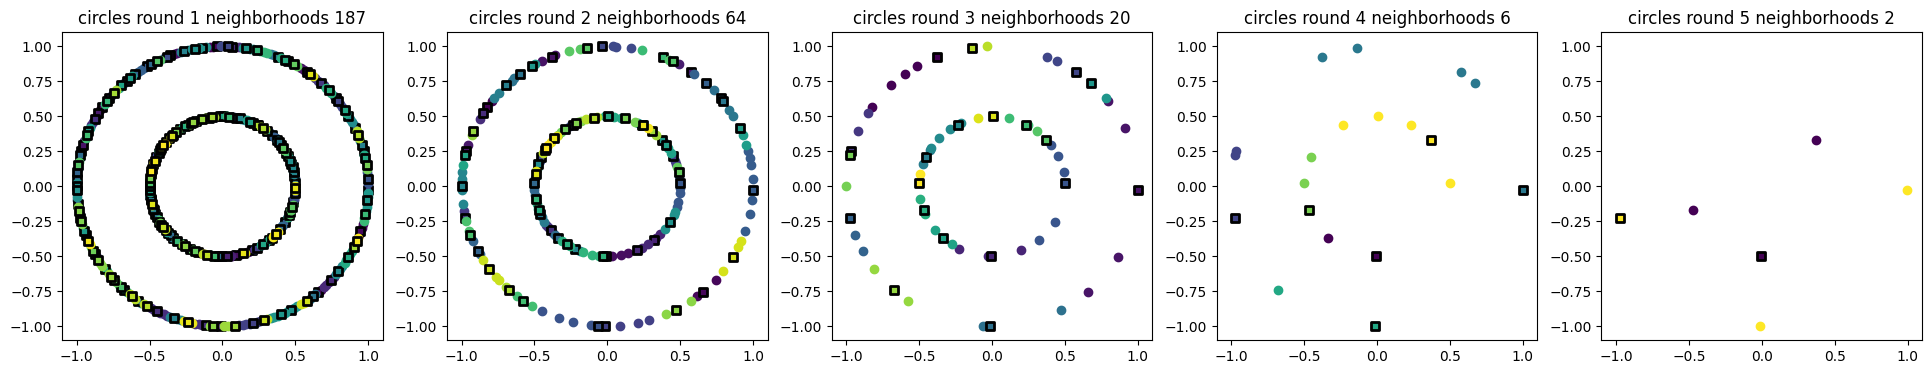

In [5]:
from algorithms.BoruvkasAlgorithm import BoruvkasAlgorithm


iters = dict()
datasets = ['blobs', 'moons', 'circles']

for i in range(len(datasets)):
    iters[i] = 0
    fig = plt.figure(figsize=(24, 4))
    axs = fig.subplots(1, 5)
    blobs_points = generate_points(datasets[i], n_samples=500, n_clusters=3)
    G = GraphGenerator(blobs_points.copy()) \
        .to_graph(gen_pair_wise=True)

    gv = GraphVisualizer(G)

    def plot(x):
        gv.plot_neighborhoods(f'{datasets[i]} round {x}', ax=axs[iters[i]])
        iters[i] += 1

    max_iterations = 30
    alg = BoruvkasAlgorithm(G, max_iterations, False, lambda x : plot(x))
    alg.run()

running Single-Linkage Agglomerative algorithm: max_iterations = 500
round 499: components 1
running Single-Linkage Agglomerative algorithm: max_iterations = 500
round 499: components 1
running Single-Linkage Agglomerative algorithm: max_iterations = 500
round 499: components 1


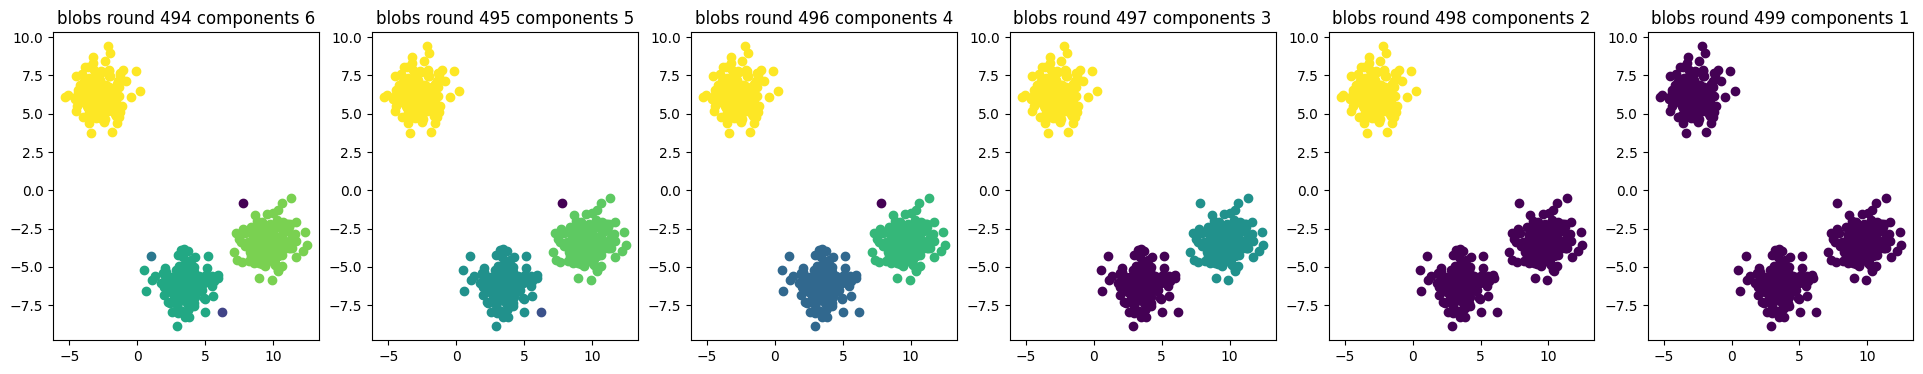

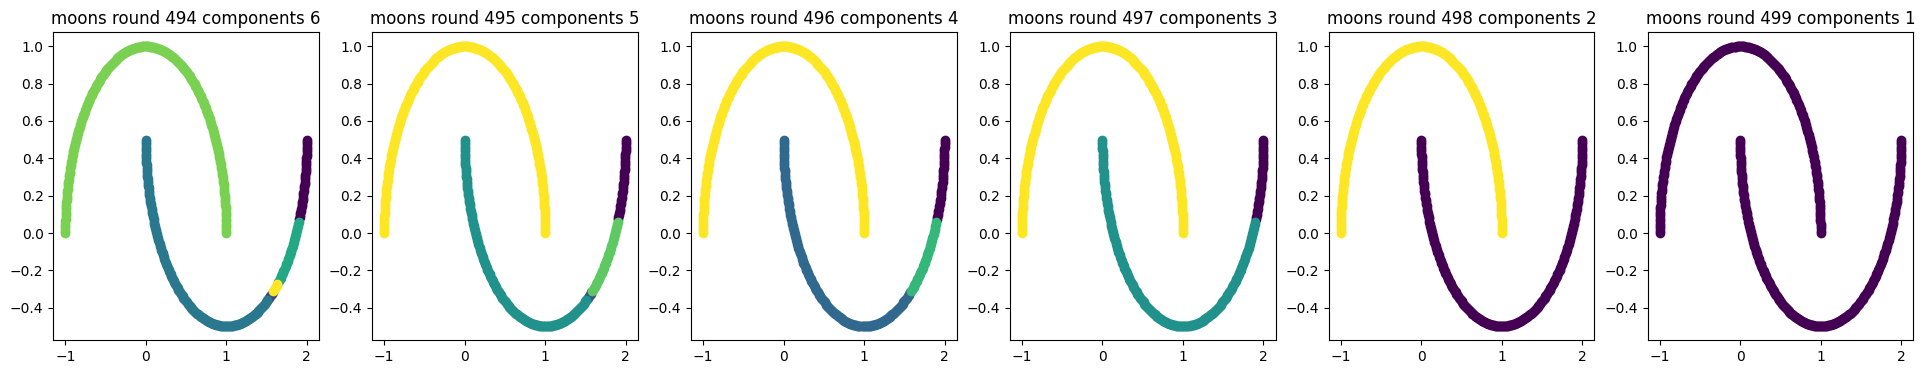

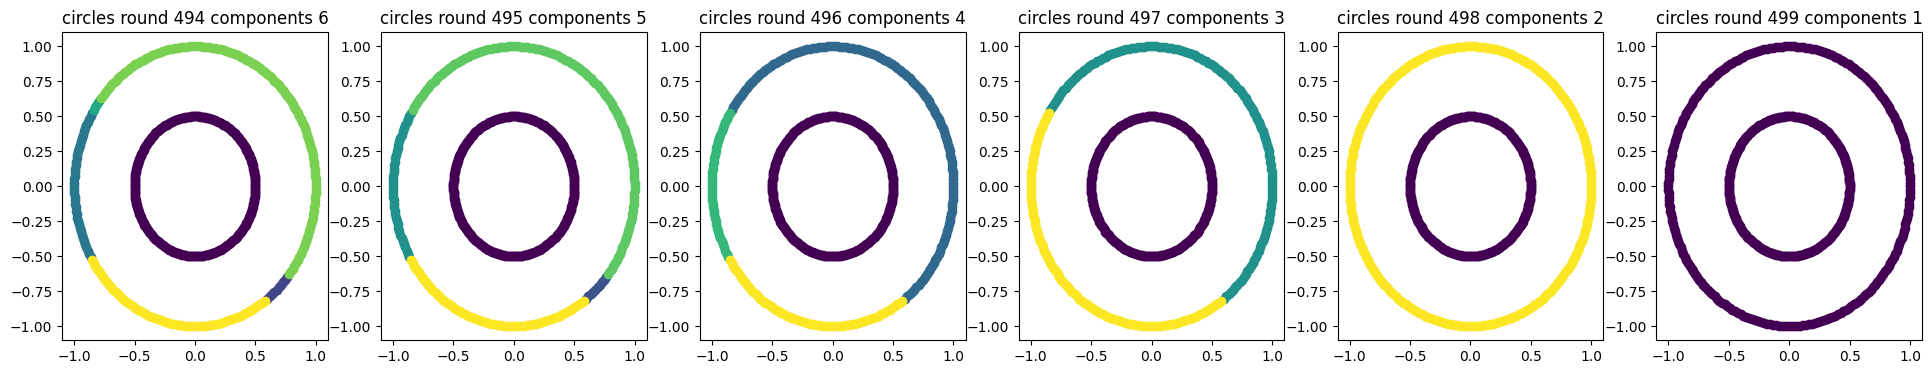

In [4]:
from algorithms.Graph import Component
from algorithms.SingleLinkAgglomerativeClusteringAlgorithm import SingleLinkAgglomerativeClusteringAlgorithm


for i in range(len(datasets)):
    iters[i] = 0
    fig = plt.figure(figsize=(24, 4))
    axs = fig.subplots(1, 6)
    blobs_points = generate_points(datasets[i], n_samples=500, n_clusters=3)
    G = GraphGenerator(blobs_points.copy()) \
        .to_graph(gen_pair_wise=True)

    gv = GraphVisualizer(G)

    def plot(x):
        gv.plot_component_graph(f'{datasets[i]} round {x}', ax=axs[iters[i]])
        iters[i] += 1

    max_iterations = len(gv.G.V)
    alg = SingleLinkAgglomerativeClusteringAlgorithm(G, max_iterations, False, lambda x : plot(x))
    alg.run(6)